## Customer segmentation - raw calculated RFM variables with K-Means Clustering


The project concerns customer segmentation by combining the RFM method and K-Means clustering. In this approach I have used raw calculated RFM variables and K-Means Clustering to determine segments of clients. The dataset includes sample sales data based on retail analytics and contains three years of sales.


**Customer segmentation**

The customer segmentation is an effective method that enables us to get better know our clients and to better correspond, their various needs. Almost every company that sells products or services stores data of shopping. This type of data can be used to execute customer segmentation thus, the results of the analysis can be translated into marketing campaigns to increase sales. One of the most widely used techniques is RFM analysis, which allows us to create personalized special offers to improve sales and decrease customer retention.

**RFM** stands for Recency, Frequency, Monetary Value and it is the technique of customer segmentation based on their transaction history. The RFM analysis is based on three criterias, which measure different customer characteristics:
-  Recency: Days since last purchase/order of the client;
- Frequency:  Total number of purchases the customer were made;
- Monetary Value: Total money the customer spent per order.


**Dataset**

The dataset comes from https://www.kaggle.com/kyanyoga/sample-sales-data.

The whole project is divided into 6 steps:
-Importing libraries and loading data set
- Data cleaning and preparation
- Data analysis and visualization
- RFM Analysis
- Model: raw calculated RFM variables + K-Means Clustering
- Description of the results


## Import libriaries and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import datetime as dt
import scipy.stats
import statsmodels.formula.api as sm

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

In [2]:
df = pd.read_csv(r'C:\Python Scripts\Datasets\sales_data_sample.csv', encoding = 'unicode_escape')
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


**First observations:**

In [3]:
df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


Shape of data:

In [5]:
df.shape

(2823, 25)

## Data cleaning


There are in data some unnecessary columns such as „ADDRESSLINE1”, „ADDRESSLINE2”, „POSTALCODE”, „TERRITORY”, „PHONE”.

In the first step I remove them. Next I regroup the column 'PRODUCTINITIAL' use only three first signs.

In [6]:
# Remove columns
data=['ADDRESSLINE1','ADDRESSLINE2','POSTALCODE', 'TERRITORY', 'PHONE', 'CITY' , 'STATE','CONTACTFIRSTNAME', 'CONTACTLASTNAME', 'MONTH_ID']
df.drop(data,axis=1,inplace=True)

In [7]:
# Regrouping product code
df['PRODUCTINITIAL'] = df['PRODUCTCODE'].str[:3]
df.drop('PRODUCTCODE',axis=1,inplace=True)

In [8]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,YEAR_ID,PRODUCTLINE,MSRP,CUSTOMERNAME,COUNTRY,DEALSIZE,PRODUCTINITIAL
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2003,Motorcycles,95,Land of Toys Inc.,USA,Small,S10
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,2003,Motorcycles,95,Reims Collectables,France,Small,S10
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,2003,Motorcycles,95,Lyon Souveniers,France,Medium,S10
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,2003,Motorcycles,95,Toys4GrownUps.com,USA,Medium,S10
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,2003,Motorcycles,95,Corporate Gift Ideas Co.,USA,Medium,S10


## Basic data analysis

Checking unique values in each column:

In [9]:
for column in df:
    print(f'Number of unique values in {column}:', df[column].nunique())

Number of unique values in ORDERNUMBER: 307
Number of unique values in QUANTITYORDERED: 58
Number of unique values in PRICEEACH: 1016
Number of unique values in ORDERLINENUMBER: 18
Number of unique values in SALES: 2763
Number of unique values in ORDERDATE: 252
Number of unique values in STATUS: 6
Number of unique values in QTR_ID: 4
Number of unique values in YEAR_ID: 3
Number of unique values in PRODUCTLINE: 7
Number of unique values in MSRP: 80
Number of unique values in CUSTOMERNAME: 92
Number of unique values in COUNTRY: 19
Number of unique values in DEALSIZE: 3
Number of unique values in PRODUCTINITIAL: 8


Checking the missing values in data:

In [10]:
df.isnull().sum()

ORDERNUMBER        0
QUANTITYORDERED    0
PRICEEACH          0
ORDERLINENUMBER    0
SALES              0
ORDERDATE          0
STATUS             0
QTR_ID             0
YEAR_ID            0
PRODUCTLINE        0
MSRP               0
CUSTOMERNAME       0
COUNTRY            0
DEALSIZE           0
PRODUCTINITIAL     0
dtype: int64

Checking unique values in CUSTOMERNAME:

In [11]:
df['CUSTOMERNAME'].nunique()

92

Checking unique values in YEAR_ID:

In [12]:
df['YEAR_ID'].unique()

array([2003, 2004, 2005], dtype=int64)

After first observations one can see that:
- there are no duplicates;
- no missing values;
- in data are 92 unique clients for whom I will perform RFM analysis.

## RFM Analysis

For making RFM analysis I need only four columns: 'CUSTOMERNAME', 'ORDERNUMBER', 'ORDERDATE' and 'SALES':

In [13]:
col =['CUSTOMERNAME', 'ORDERNUMBER', 'ORDERDATE', 'SALES']
RFM = df[col]
RFM.head()

,CUSTOMERNAME,ORDERNUMBER,ORDERDATE,SALES
0,Land of Toys Inc.,10107,2/24/2003 0:00,2871.00
1,Reims Collectables,10121,5/7/2003 0:00,2765.90
2,Lyon Souveniers,10134,7/1/2003 0:00,3884.34
3,Toys4GrownUps.com,10145,8/25/2003 0:00,3746.70
4,Corporate Gift Ideas Co.,10159,10/10/2003 0:00,5205.27


In [14]:
RFM.shape

(2823, 4)

In RFM clustering it is usually assumed that only operations from the last 12 months are taken into account. The reason for this is simple. The older operations can say little about the current situation of the seller, buyer, and the product itself. In order to set them you need to adopt an agreed date for the grouping. In the data for "today" I will assume the day of the newest operation in the set.

In [15]:
RFM['ORDERDATE'] = pd.to_datetime(RFM['ORDERDATE'], errors='coerce')

C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
RFM.head()

,CUSTOMERNAME,ORDERNUMBER,ORDERDATE,SALES
0,Land of Toys Inc.,10107,2003-02-24,2871.00
1,Reims Collectables,10121,2003-05-07,2765.90
2,Lyon Souveniers,10134,2003-07-01,3884.34
3,Toys4GrownUps.com,10145,2003-08-25,3746.70
4,Corporate Gift Ideas Co.,10159,2003-10-10,5205.27


In [17]:
RFM['ORDERDATE'].max()

Timestamp('2005-05-31 00:00:00')

In [18]:
now = dt.datetime(2005,5,31)

**Create the RFM Table:**

Calculation of the "Recency" variable - information about how long ago the customer was shopping in the store:

In [19]:
rfm_df = RFM.groupby('CUSTOMERNAME').agg({'ORDERDATE': lambda x: (now - x.max()).days}) 

"Frequency" and "Monetary value" I made by the using groupby method:

In [20]:
rfm_df['Frequency'] = RFM.groupby(by=['CUSTOMERNAME'])['ORDERNUMBER'].count()

In [21]:
rfm_df['MonetaryValue'] = RFM.groupby(by='CUSTOMERNAME').agg({'SALES': 'sum'})

In [25]:
rfm_df.head()

,ORDERDATE,Frequency,MonetaryValue
CUSTOMERNAME,,,
"AV Stores, Co.",195,51,157807.81
Alpha Cognac,64,20,70488.44
Amica Models & Co.,264,26,94117.26
"Anna's Decorations, Ltd",83,46,153996.13
Atelier graphique,187,7,24179.96


I rename 'ORDERDATE' value to 'Recency':

In [26]:
rfm_df.rename(columns={'ORDERDATE': 'Recency'}, inplace=True)
rfm_df.head()

,Recency,Frequency,MonetaryValue
CUSTOMERNAME,,,
"AV Stores, Co.",195,51,157807.81
Alpha Cognac,64,20,70488.44
Amica Models & Co.,264,26,94117.26
"Anna's Decorations, Ltd",83,46,153996.13
Atelier graphique,187,7,24179.96


## Model: raw calculated RFM variables + K-Means Clustering

In this approach I have used raw calculated RFM variables (Recency, Frequency, MonetaryValue) and K-means clustering.

There are many outliers in the data then before modeling I apply normalization.

#### Basic data analysis of RFM table

Firstly I plot the data to get more insight:

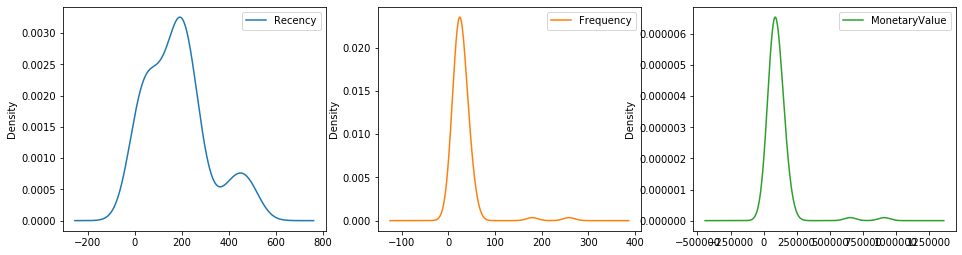

In [27]:
plt.rcParams['figure.figsize'] = [16, 14]
rfm_df.plot(kind="density", subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()

Histograms of variables:Recency, Frequency and MonetaryValue:

C:\Users\PC\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PC\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PC\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

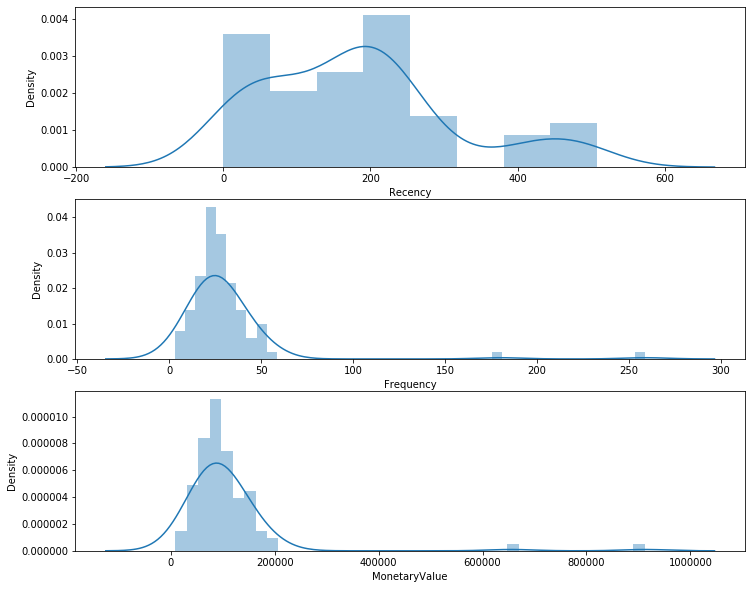

In [28]:
plt.figure(figsize=(12,10))
# Recency variable distribution 
plt.subplot(3, 1, 1); sns.distplot(rfm_df['Recency'])
# Frequency variable distribution 
plt.subplot(3, 1, 2); sns.distplot(rfm_df['Frequency'])
# MonetaryValue variable distribution 
plt.subplot(3, 1, 3); sns.distplot(rfm_df['MonetaryValue'])

Based on above charts it can be seen that the variables doesn't have a symmetric distribution. The Frequency and MonetarValue variables are skewed distributions. In addition many outliers are observed. 

Checking statistics:

In [29]:
rfm_df.describe()

,Recency,Frequency,MonetaryValue
count,92.000000,92.000000,92.000000
mean,181.826087,30.684783,109050.313587
std,131.420524,30.934503,110308.612808
min,0.000000,3.000000,9129.350000
25%,80.250000,19.750000,70129.432500
50%,185.000000,26.000000,86522.610000
75%,229.250000,32.500000,120575.875000
max,508.000000,259.000000,912294.110000


From above analysis one can see that the minimum value for Recency for a specific client identifier is 0. So this transaction does not make sense and must be deleted. 

One can also see that there are not get constant mean and standard deviation values. 

Then I drop client with 0 value from Recency variable:

In [30]:
rfm_df[rfm_df['Recency'] == 0]

,Recency,Frequency,MonetaryValue
CUSTOMERNAME,,,
Euro Shopping Channel,0,259,912294.11
La Rochelle Gifts,0,53,180124.90


In [31]:
rfm_df = rfm_df[rfm_df['Recency'] > 0]
rfm_df.reset_index(drop=True,inplace=True)

In [32]:
raw_data = rfm_df[['Recency','Frequency','MonetaryValue']]

In [33]:
raw_data.describe()

,Recency,Frequency,MonetaryValue
count,90.000000,90.000000,90.000000
mean,185.866667,27.900000,99335.664889
std,130.000104,19.475741,70991.470146
min,1.000000,3.000000,9129.350000
25%,84.500000,19.250000,69411.417500
50%,187.500000,25.500000,85363.790000
75%,229.750000,32.000000,117934.592500
max,508.000000,180.000000,654858.060000


In this step I apply log transformation to the data and then normalize it:

In [34]:
# Unskew the data
data_log = np.log(raw_data)

Initialize a standard scaler and fit it:

In [35]:
scaler = StandardScaler()
scaler.fit(data_log)

data_sc = scaler.transform(data_log)

In [36]:
df_norm = pd.DataFrame(data_sc, columns=raw_data.columns)

In [37]:
df_norm.head()

,Recency,Frequency,MonetaryValue
0,0.380566,1.417734,1.124103
1,-0.509786,-0.367558,-0.359312
2,0.622670,0.132816,0.172800
3,-0.302040,1.220944,1.079099
4,0.347089,-2.369750,-2.328643


Checking for skewness in the data now:

C:\Users\PC\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PC\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PC\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

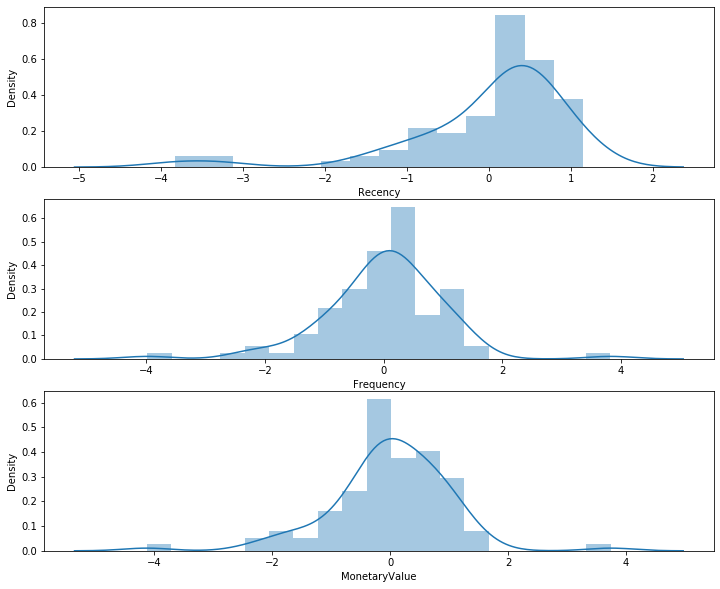

In [38]:
plt.figure(figsize=(12,10))
# Recency variable distribution 
plt.subplot(3, 1, 1); sns.distplot(df_norm['Recency'])
# Frequency variable distribution 
plt.subplot(3, 1, 2); sns.distplot(df_norm['Frequency'])
# MonetaryValue variable distribution 
plt.subplot(3, 1, 3); sns.distplot(df_norm['MonetaryValue'])

After applied normalization to the data one can see that skewness has been removed.

### K-Means clustering model

K-means is an unsupervised machine learning algorithm, which is used for data clustering. In k-means algorithm number of clusters K is predetermined and the algorithm iteratively assigns each data point to one of the K clusters based on the feature similarity.

The optimal number of clusters I will find using the elbow method:

In [39]:
group = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, random_state=1)
    kmeans.fit(df_norm)
    group.append([i, kmeans.inertia_])
groups = pd.DataFrame(group, columns = ['number of group', 'inertia'])

In [40]:
groups

,number of group,inertia
0,1,270.000000
1,2,167.213622
2,3,111.918503
3,4,81.792459
4,5,66.786975
5,6,51.962335
6,7,38.781916
7,8,31.434893
8,9,25.288073
9,10,20.261730


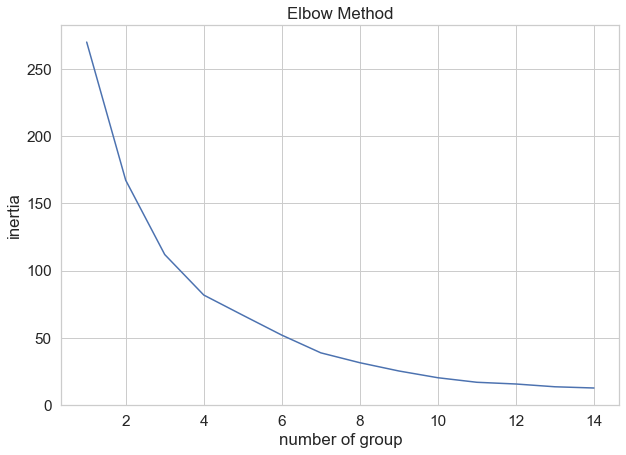

In [41]:
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4, style="whitegrid")
sns.lineplot(data = groups, x = 'number of group', y = 'inertia').set(title = "Elbow Method")
plt.show()

Based on the Elbow plot I will prepare model for 4 clusters.

The function of visualize grouping:

In [42]:
def plots_model():
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    # Group data by 'groups'
    grouped_data = rfm_df.groupby('groups')
    
    # Plot each group separately
    for i, (group_name, group_data) in enumerate(grouped_data):
        xs = group_data['Recency']
        ys = group_data['MonetaryValue']
        zs = group_data['Frequency']
        ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w', label=group_name)

    ax.set_xlabel('Recency')
    ax.set_zlabel('Frequency')
    ax.set_ylabel('MonetaryValue')
    plt.title('Visualization of created groups')
    plt.legend()
    plt.show()

In [43]:
model = KMeans(n_clusters=4, init='k-means++', max_iter=300)
groups = model.fit_predict(df_norm)
df_norm['groups'] = groups
rfm_df['groups'] = groups

C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


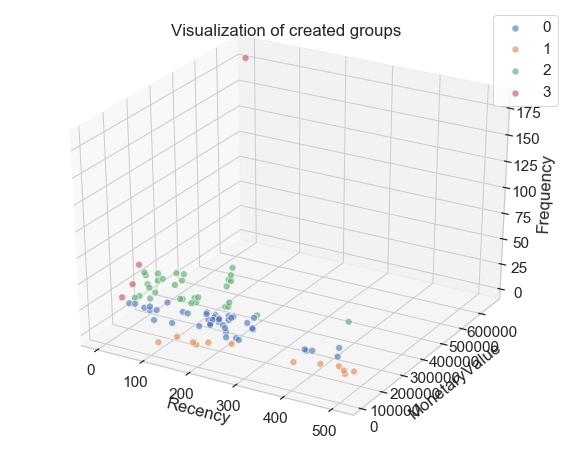

In [44]:
plots_model()

Adding column groups to DataFrame:

In [45]:
rfm_df.head()

,Recency,Frequency,MonetaryValue,groups
0,195,51,157807.81,2
1,64,20,70488.44,0
2,264,26,94117.26,0
3,83,46,153996.13,2
4,187,7,24179.96,1


Distribution of the size of individual groups:

In [46]:
print((df_norm.groups.value_counts(normalize = True, sort = True) * 100).to_string())

0    47.777778
2    34.444444
1    13.333333
3     4.444444


Statistics for the whole set:

In [47]:
rfm_df.agg(['mean'])

,Recency,Frequency,MonetaryValue,groups
mean,185.866667,27.9,99335.664889,0.955556


Distribution of the size of individual groups:

In [48]:
rfm_df.groupby('groups').agg(['mean'])

,Recency,Frequency,MonetaryValue
,mean,mean,mean
groups,,,
0,208.162791,22.093023,78633.205814
1,323.250000,10.666667,35628.653333
2,125.548387,37.129032,133158.014516
3,1.500000,70.500000,250884.925000


The sum of the values for each group:

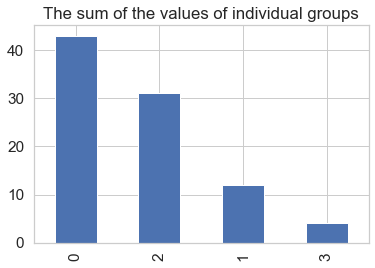

In [49]:
rfm_df.groups.value_counts().plot(kind='bar', figsize=(6,4), title='The sum of the values of individual groups');

In [50]:
rfm_df.head()

,Recency,Frequency,MonetaryValue,groups
0,195,51,157807.81,2
1,64,20,70488.44,0
2,264,26,94117.26,0
3,83,46,153996.13,2
4,187,7,24179.96,1


Function to assigned segment name to each value:

In [51]:
def name(row):
    segment_mapping = {0: 'departing', 1: 'new', 2: 'inactive'}
    return segment_mapping.get(row, 'active')

Adding column SegmentName to DataFrame:

In [52]:
rfm_df['SegmentName'] = rfm_df['groups'].apply(name)

C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [53]:
rfm_df.head()

,Recency,Frequency,MonetaryValue,groups,SegmentName
0,195,51,157807.81,2,inactive
1,64,20,70488.44,0,departing
2,264,26,94117.26,0,departing
3,83,46,153996.13,2,inactive
4,187,7,24179.96,1,new


In [55]:
# Save recommendations to a CSV file
rfm_df.to_csv('C:\Python Scripts\Projects_done\Customer_segmentation\customers_segments2.csv', index=False)  

## Description of the results


**Interpretation of the resulting groups:**

From above analysis I have obtained segmentation for four groups. They can be interpret as the following customer segments:

- **Group 0**: Customers who were shopping for a long time, buy moderately often and they shop for high amounts.
- **Group 1**: Customers who have been shopping recently, they rarely buy and make purchases for relatively small amounts.
- **Group 2**: Customers who have not been buying anything for a long time, they rarely buy and make purchases for relatively small amounts.
- **Group 3**: Customers who have been shopping recently, they buy often and make purchases for large amounts.

Based on the received groups they can be name as follows:

- **Group 0** - former best customers - **departing**,
- **Group 1** - new and random customers - **new**,
- **Group 2** - old and random customers - **inactive**,
- **Group 3** - best customers - **active**.

## Summary

In this approach I tested a second method of customer segmentation. I have used raw calculated RFM variables and K-Means Clustering to determine segments of clients. From above analysis I have obtained the similar results to previous method, i.e. RFM scoring + K-means clustering.